# Visualizacion varias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from scipy import stats
import seaborn as sns
#import geopandas as gpd
import matplotlib
import ipywidgets as widgets
from ipywidgets import interact
matplotlib.style.use("ggplot")
import folium
from folium.plugins import DualMap 
import mapas

## Evolucion de genero en grupo de carreras

In [37]:
df_evolucion_carreras = pd.read_csv('data/output/carreras_evolucion_genero.csv',delimiter=',')

In [38]:
variables_carreras = df_evolucion_carreras.carrera_grupo.unique()

In [39]:
@interact(carrera_grupo = sorted(variables_carreras))
def generate_chart_evolucion_carreras(carrera_grupo):
    serie_grupo_carrera = df_evolucion_carreras[df_evolucion_carreras.carrera_grupo == carrera_grupo][[
        "anio","estudiantes_mujeres_pct"
    ]]
    return serie_grupo_carrera.set_index("anio").plot()
    

interactive(children=(Dropdown(description='carrera_grupo', options=('Abogado', 'Arquitectura', 'Arte', 'Depor…

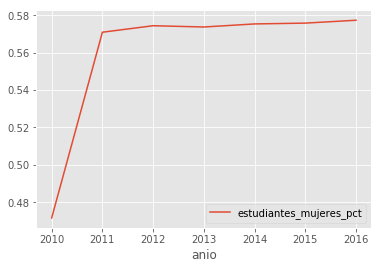

In [40]:
generate_chart_evolucion_carreras("Abogado")

## Mapa universidades

In [7]:
df_universidades = pd.read_csv('data/output/universidades.csv',delimiter=',')
df_universidades

,institucion_nombre,institucion_direccion,api,coordenadas,lat,lon,departamento_id,departamento_nombre,latitud,longitud,municipio_id,municipio_nombre,provincia_id,provincia_nombre,carrera_grupo,carrera_nombre
0,Universidad CAECE,Av. de Mayo 866,http://apis.datos.gob.ar/georef/api/direccione...,"-34.608865810462795,-58.378716306442456",-34.608866,-58.378716,2007,Comuna 1,-34.608866,-58.378716,NaN,NaN,2,Ciudad Autónoma de Buenos Aires,"Psicologia,Deporte,Tecnologia,Ingenieria,Arte,...",Formacion Docente para el nivel medio y/o supe...
1,Universidad Nacional de Córdoba,Av. Haya de la Torre s/n,http://apis.datos.gob.ar/georef/api/direccione...,"-31.4354809,-64.1877589",-31.435481,-64.187759,14014,Capital,-31.435481,-64.187759,140077.0,Córdoba,14,Córdoba,NaN,NaN
2,Universidad Nacional de Rosario,Maipú 1065,http://apis.datos.gob.ar/georef/api/direccione...,"-32.950309649805945,-60.636126952347716",-32.950310,-60.636127,82084,Rosario,-32.950310,-60.636127,NaN,NaN,82,Santa Fe,"Psicologia,Otros,Tecnologia,Letras,Ingenieria,...","Ingenieria Electrica,Finanzas y Negocios,Biolo..."
3,Universidad Nacional de Río Cuarto,Ruta Nac. 36 - Km. 601,http://apis.datos.gob.ar/georef/api/direccione...,"-33.084594014186514,-64.3349444221352",-33.084594,-64.334944,14098,Río Cuarto,-33.084594,-64.334944,140861.0,Río Cuarto,14,Córdoba,NaN,NaN
4,Universidad Nacional de San Juan,Mitre 396,http://apis.datos.gob.ar/georef/api/direccione...,"-31.5354691,-68.5412352,15",-31.535469,-68.541235,70028,Capital,-31.535469,-68.541235,700028.0,San Juan,70,San Juan,"Tecnologia,Letras,Ingenieria,Arte,Exactas,Soci...","Ingenieria Quimica,Computacion, Sistemas e Inf..."
5,Universidad Nacional de San Luis,Ejército de los Andes 950,http://apis.datos.gob.ar/georef/api/direccione...,"-33.2962223,-66.3441194",-33.296222,-66.344119,74056,Juan Martín de Pueyrredón,-33.296222,-66.344119,740133.0,San Luis,74,San Luis,"Psicologia,Tecnologia,Ingenieria,Arte,Exactas,...","Ingenieria Quimica,Educacion Fisica y Deportes..."
6,Universidad Nacional del Comahue,Av. Santa Fe 1845,http://apis.datos.gob.ar/georef/api/direccione...,"-34.59583822943477,-58.393932130303796",-34.595838,-58.393932,2014,Comuna 2,-34.595838,-58.393932,NaN,NaN,2,Ciudad Autónoma de Buenos Aires,"Psicologia,Tecnologia,Ingenieria,Letras,Exacta...","Ingenieria Quimica,Tecnologia e Ingenieria Min..."
7,Universidad Nacional del Sur,Av. Alem 1253,http://apis.datos.gob.ar/georef/api/direccione...,"-38.67866305629395,-62.29611089500422",-38.678663,-62.296111,6056,Bahía Blanca,-38.678663,-62.296111,60056.0,Bahía Blanca,6,Buenos Aires,"Tecnologia,Ingenieria,Arte,Exactas,Sociales,De...","Ingenieria Quimica,Computacion, Sistemas e Inf..."
8,Universidad de Buenos Aires,Viamonte 430,http://apis.datos.gob.ar/georef/api/direccione...,"-34.59971093266858,-58.37308898582941",-34.599711,-58.373089,2007,Comuna 1,-34.599711,-58.373089,NaN,NaN,2,Ciudad Autónoma de Buenos Aires,"Psicologia,Deporte,Tecnologia,Otros,Ingenieria...","Ingenieria Quimica,Ingenieria Electrica,Finanz..."
9,Universidad Católica de Salta,Av. Presidente Roque Sáenz Peña 950,http://apis.datos.gob.ar/georef/api/direccione...,"-24.7399552,-65.3940334",-24.739955,-65.394033,66028,Capital,-24.739955,-65.394033,660063.0,Salta,66,Salta,NaN,NaN


In [3]:
argentina_coords = [-40, -64]
osm_no_labels = "https://tiles.wmflabs.org/osm-no-labels/{z}/{x}/{y}.png"
ign_labels = "http://wms.ign.gob.ar/geoserver/gwc/service/tms/1.0.0/capabaseargenmap@EPSG%3A3857@png/{z}/{x}/{y}.png"

In [4]:
mapa = folium.Map(location=argentina_coords, zoom_start=4)
folium.TileLayer(ign_labels, tms=True, attr="IGN").add_to(mapa)
mapa

In [23]:
def mapear_universidades(mapa, df, lat_col, lon_col, institucion_nombre_col, carreras_grupos_col):
    """ cargar informacion al marker de forma masiva.

        Args:
            lat (float): latitud
            lon (float): longuitud
            institucion_nombre (str): nombre de la universidad
            carreras_grupos (list): lista con las areas de estudios ofrecidas

        """
    

In [ ]:
mapear_universidades(mapa,df_universidades,"lat","lon","institucion_nombre","carrera_grupo")

In [5]:
mapas.crear_marker(mapa,-40, -64,"UBA",["Tech","abogacia","economia"])

In [6]:
mapa